
#    Описательная статистика + визуализация + EDA + модель

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Выбор варианта


In [2]:
variant = 1

params = {
    1: (50, 64), 2: (55, 100), 3: (60, 144), 4: (65, 81), 5: (70, 121),
    6: (75, 169), 7: (80, 100), 8: (85, 144), 9: (90, 81), 10: (95, 121),
    11: (100, 64), 12: (105, 100), 13: (110, 144), 14: (115, 81), 15: (120, 121)
}

mu, var = params[variant]
sigma = np.sqrt(var)

print(f"ВАРИАНТ {variant}")

ВАРИАНТ 1



# ШАГ 0: Генерация выборки

In [3]:
np.random.seed(variant)
n = 100
x = np.random.normal(50, 64, 100)   # заполнить параметры

df = pd.DataFrame({"x": x})
df["feature2"] = df["x"] + np.random.normal(0, 7, n)

# ШАГ 1: Вариационный ряд

In [4]:
#variation = np.___(df["x"])   # отсортировать
variation = df["x"].sort_values()
variation

,x
5,-97.298477
11,-81.849005
75,-79.420878
70,-42.423284
69,-39.375765
...,...
38,156.227339
43,158.317094
6,161.667953
47,184.416329


# ШАГ 2: Выборочная статистика

In [5]:
#написать код для выборочных оценок
mean = df['x'].mean()
median = df['x'].median()
var_sample = df['x'].var()
std_sample = var_sample**0.5

print("\nВыборочные оценки:")
print(f"Среднее = {mean:.2f}")
print(f"Медиана = {median:.2f}")
print(f"Дисперсия = {var_sample:.2f}")
print(f"Ст. отклонение = {std_sample:.2f}")


Выборочные оценки:
Среднее = 53.88
Медиана = 54.10
Дисперсия = 3241.64
Ст. отклонение = 56.94


# ШАГ 3: Гистограмма + Скотт

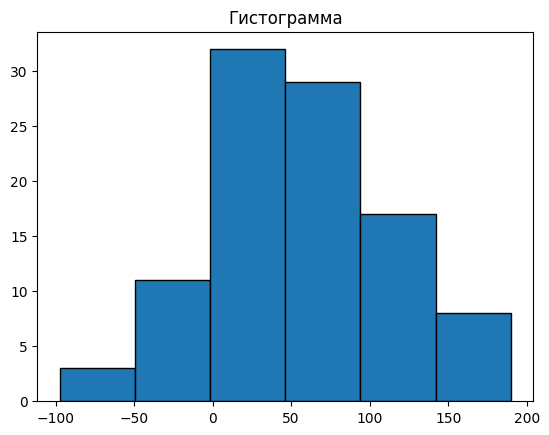

In [6]:
h = 3.5 * std_sample * n**(-1/3)
k = int((df["x"].max() - df["x"].min()) / h)

plt.hist(df["x"], bins=k, edgecolor="black")
plt.title("Гистограмма")
plt.show()

# ШАГ 4: Полигон частот

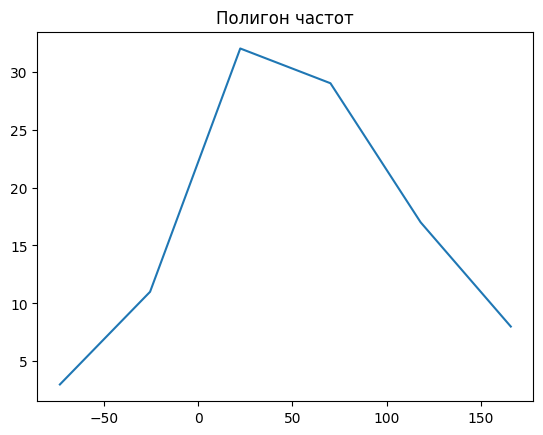

In [7]:
counts, bins = np.histogram(df["x"], bins=k)
centers = (bins[:-1] + bins[1:]) / 2

plt.plot(centers, counts)       # заполнить данные
plt.title("Полигон частот")
plt.show()

# ШАГ 5: Эмпирическая ФР

In [8]:
df.head()

,x,feature2
0,153.958103,150.828203
1,10.847590,19.419143
2,16.197008,19.021449
3,-18.669992,-14.514942
4,105.386088,97.721705


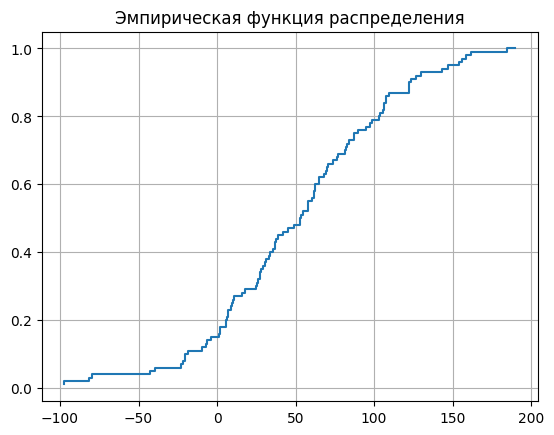

In [9]:
plt.step(variation, np.arange(1, n+1)/n)
plt.title("Эмпирическая функция распределения")
plt.grid()
plt.show()

# Корреляции + Pairplot

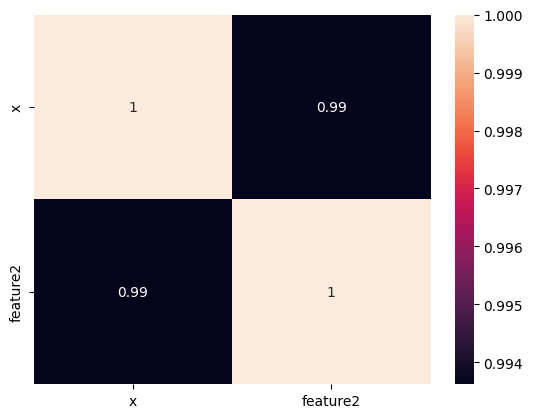

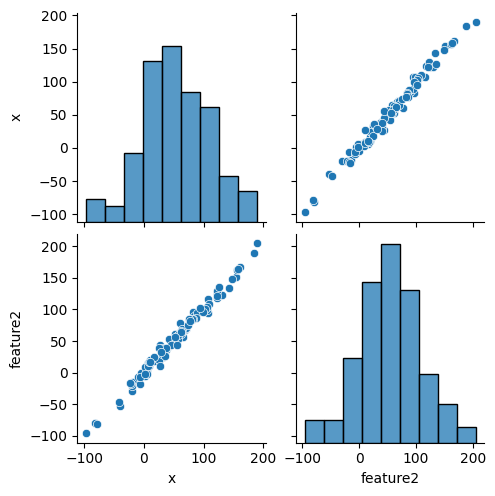

In [10]:
sns.heatmap(df[["x", "feature2"]].corr(), annot=True)
plt.show()

sns.pairplot(df)   # сделать pairplot
plt.show()

In [11]:
print("Shapiro:", shapiro(df['x']) )
print("KS:", kstest(df["x"], 'norm', args=(mean, std_sample)))

Shapiro: ShapiroResult(statistic=np.float64(0.9920044105306344), pvalue=np.float64(0.8215451857179022))
KS: KstestResult(statistic=np.float64(0.04330972976650932), pvalue=np.float64(0.9879299613543081), statistic_location=np.float64(38.96459471677211), statistic_sign=np.int8(1))


# ШАГ 6: Сравнение с истинными

In [13]:
print("\nСравнение истинных и выборочных параметров:")
print(f"μ истинное = {mu},   μ выборочное = {mean:.2f}")
print(f"σ² истинная = {var}, σ² выборочная = {var_sample:.2f}")


Сравнение истинных и выборочных параметров:
μ истинное = 50,   μ выборочное = 53.88
σ² истинная = 64, σ² выборочная = 3241.64


# EDA


Корреляции:
                x  feature2
x         1.00000   0.99362
feature2  0.99362   1.00000


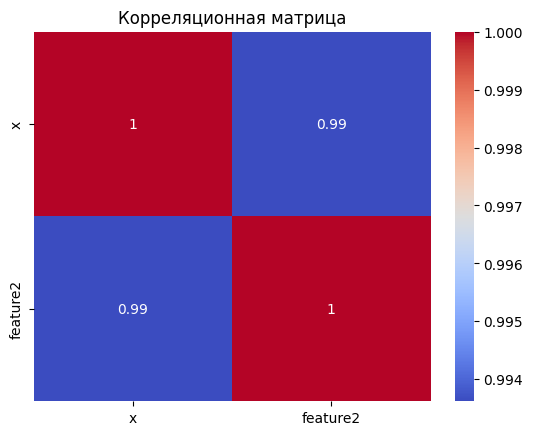

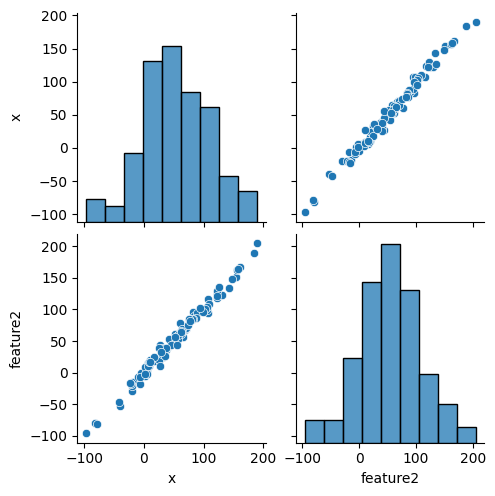

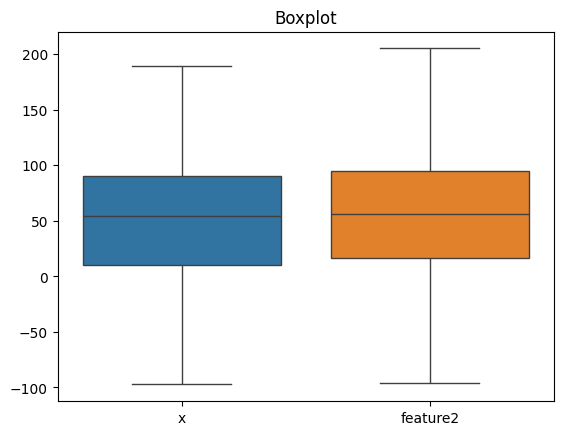


Shapiro–Wilk p = 0.8215451857179022
KS p = 0.9879299613543081


In [14]:
print("\nКорреляции:")
print(df.corr())

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

sns.pairplot(df)
plt.show()

sns.boxplot(data=df)
plt.title("Boxplot")
plt.show()

# Тесты на нормальность
print("\nShapiro–Wilk p =", shapiro(df["x"]).pvalue)
print("KS p =", kstest(df["x"], 'norm', args=(mean, std_sample)).pvalue)

# Линейная регрессия

Коэффициент a = 1.0104373427430966
Свободный член b = 0.5072275707325886
MSE = 42.21249599979383
R² = 0.9872807028952604


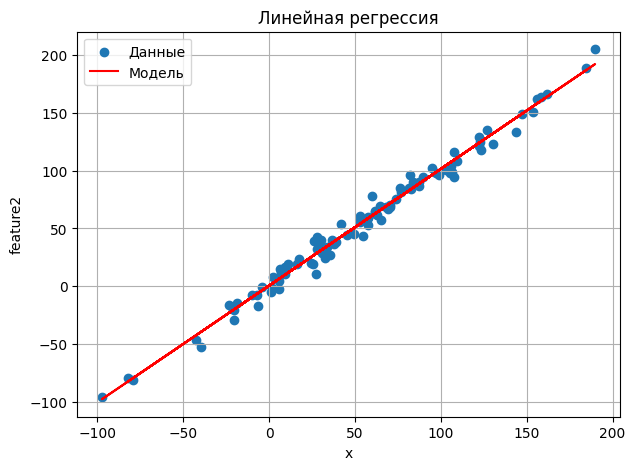

In [15]:
X = df[["x"]]
y = df["feature2"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Коэффициент a =", model.coef_[0])
print("Свободный член b =", model.intercept_)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE =", mse)
print("R² =", r2)

# График регрессии
plt.figure(figsize=(7,5))
plt.scatter(X, y, label="Данные")
plt.plot(X, y_pred, color="red", label="Модель")
plt.title("Линейная регрессия")
plt.xlabel("x")
plt.ylabel("feature2")
plt.legend()
plt.grid()
plt.show()